# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GSKri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q= 'Bitcoin',
    language='en',
    page_size=100,
    sort_by = 'relevancy'
)

In [7]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q= 'Ethereum',
    language='en',
    page_size=100,
    sort_by = 'relevancy'
)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []
for article in bitcoin_news['articles']:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu  
        })
        
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
4,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833


In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment = []
for article in ethereum_news['articles']:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu  
        })
        
    except AttributeError:
        pass

# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
2,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
3,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
4,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,-0.075662,0.053910,0.070240,0.875870
std,0.438774,0.061463,0.076244,0.087159
min,-0.859300,0.000000,0.000000,0.557000
25%,-0.386825,0.000000,0.000000,0.832500
50%,0.000000,0.044500,0.064500,0.876500
75%,0.250000,0.088750,0.103250,0.935000
max,0.817600,0.262000,0.300000,1.000000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.024702,0.070720,0.057510,0.871800
std,0.481089,0.083508,0.068791,0.091463
min,-0.859300,0.000000,0.000000,0.622000
25%,-0.381800,0.000000,0.000000,0.822000
50%,0.000000,0.050500,0.045000,0.874000
75%,0.406800,0.113250,0.083500,0.938000
max,0.952000,0.378000,0.300000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'ha','wa', 'us'}

This was an alternative code I tried using but the data was not very clean so I switched to the way we learned in class with better results

In [14]:
# Create a tokenized list of the words
    #words = word_tokenize(text)

    # Remove the punctuation from text
    #words = list(filter(lambda t: t not in punctuation, words))

    # Lemmatize words into root words
    #words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    #words = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words
    #tokens = list(filter(lambda t: t.lower() not in sw, words))
    
    #return tokens

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    sw = set(stopwords.words('english'))
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)  
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # lemmatize words into root words  
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase/ Remove stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, always, bitcoin, skeptic, bi..."
3,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."
4,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."


In [17]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, revealed, nfts, work, instagram, usbase..."
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[gamestop, officially, thrown, headlong, web, ..."
2,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
3,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, labs,..."
4,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[gamestop, going, allin, crypto, video, game, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
bitcoin_string = ''.join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_string)
bitcoin_bigrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_bigrams.most_common(10)))

{('may', 'reuters'): 24, ('charsmay', 'reuters'): 11, ('kong', 'may'): 6, ('digital', 'currency'): 6, ('reuters', 'bitcoin'): 5, ('world', 'biggest'): 5, ('record', 'losing'): 4, ('losing', 'streak'): 4, ('charshong', 'kong'): 4, ('charslondon', 'may'): 4}


In [20]:
# Generate the Ethereum N-grams where N=2
ethereum_string = ''.join(ethereum_df.text)
ethereum_processed = tokenizer(ethereum_string)
ethereum_bigrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_bigrams.most_common(10)))

{('charsmay', 'reuters'): 6, ('last', 'week'): 5, ('crypto', 'market'): 5, ('yacht', 'club'): 4, ('may', 'reuters'): 4, ('reuters', 'bitcoin'): 4, ('world', 'biggest'): 4, ('charsthe', 'cryptocurrency'): 4, ('bitcoin', 'ethereum'): 3, ('previous', 'closebitcoin'): 3}


In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
display(token_count(bitcoin_processed))

[('bitcoin', 45),
 ('reuters', 38),
 ('cryptocurrency', 34),
 ('may', 30),
 ('crypto', 24),
 ('market', 18),
 ('cryptocurrencies', 17),
 ('world', 15),
 ('week', 15),
 ('price', 13)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
display(token_count(ethereum_processed))

[('crypto', 34),
 ('cryptocurrency', 29),
 ('bitcoin', 19),
 ('market', 18),
 ('week', 14),
 ('world', 14),
 ('web', 13),
 ('company', 12),
 ('cryptocurrencies', 12),
 ('charsthe', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

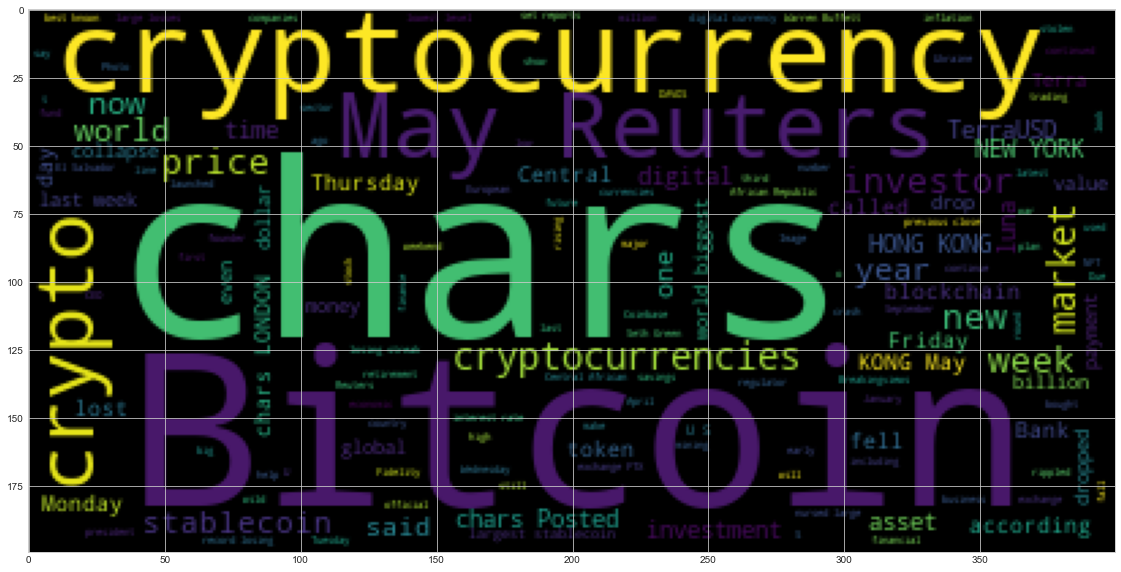

In [25]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_string)
plt.imshow(wc)

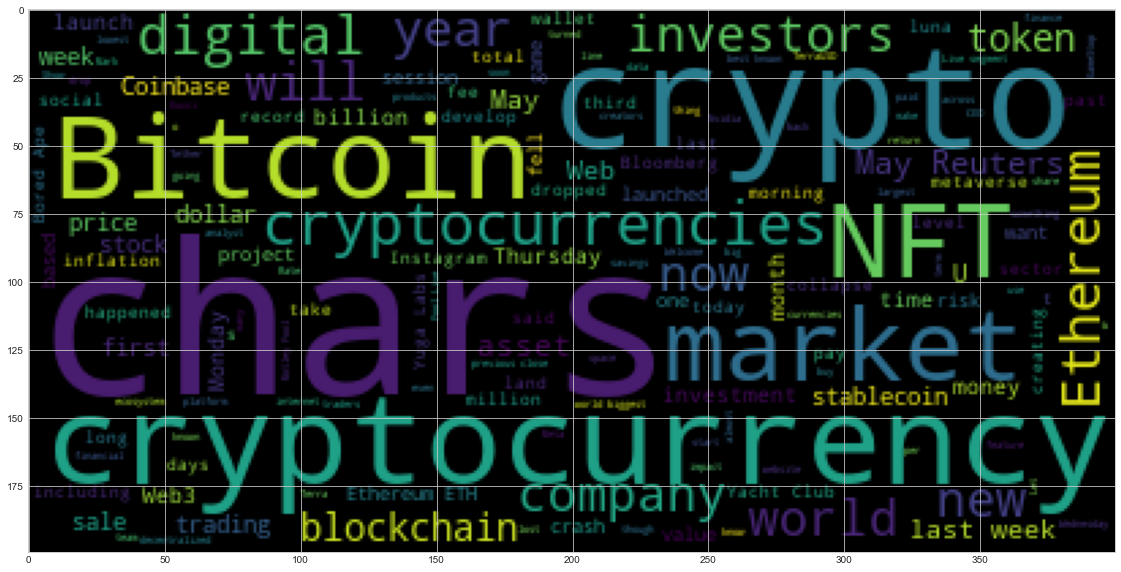

In [26]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ''.join(bitcoin_df.text)
bitcoin_text

'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars]Image source, Getty Images\r\nThe value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to the Coinbase cryptocurrency exchange.\r\nThe world\'s largest cryp… [+2164 chars]As a kid, I remember when my father tried to use a broom handle in a last ditch effort to support a roof that was collapsing from the

In [31]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_text)

# Add a title to the document
bitcoin_ner.user_data['title'] = 'Bitcoin NER'

In [32]:
# Render the visualization
displacy.render(bitcoin_ner, style = 'ent')

In [33]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent.text + '' + ent.label_)

OdeniranGPE
LindenGPE
TexasGPE
April 4th, 2022DATE
PhotoPERSON
FRANCOIS PICARD/AFPORG
Getty ImagesORG
BuffettPERSON
the weekendDATE
Getty Images
ORG
the weekendDATE
34,000MONEY
27,630MONEY
CoinbasePERSON
nearly three feetQUANTITY
Last weekDATE
Fidelity InvestmentsORG
the US TreasuryORG
Grayson BlackmonPERSON
Oliyarnyk / CC-BY-SA-4.0ORG
Michael ChobanianPERSON
the Blockchain Association of UkraineORG
BitcoinORG
Gucci handbagPERSON
weekDATE
Kristy KilburnPERSON
May 11DATE
ReutersORG
7.23%PERCENT
28,758.29MONEY
GMTWORK_OF_ART
WednesdayDATE
2,241.68MONEY
40.4%PERCENT
+361 chars]May 4ORG
ReutersORG
5.7%PERCENT
39,862.84MONEY
WednesdayDATE
2,102.94MONEY
20.9%PERCENT
yearDATE
9CARDINAL
ReutersORG
7.81%PERCENT
31,333.41MONEY
GMTWORK_OF_ART
MondayDATE
2,655.98MONEY
35%PERCENT
last JulyDATE
33,000MONEY
the weekDATE
last weekDATE
FedORG
MexicanNORP
North LondonLOC
a few weeks agoDATE
+2779 chars]MayORG
24CARDINAL
ReutersORG
its ninth weekDATE
ReutersORG
+4315 chars]TerraPERSON
Seth Green'sPERSON


---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
ethereum_text = ''.join(ethereum_df.text)
ethereum_text

'Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you\'ve bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars]A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\r\nYuga Labs, the comp… [+3475 chars]When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to be the biggest NFT launch ever. Otherside is an upcoming Bore… [+6669 chars]GameStop is going all-in on crypto. The video game retailer launched\xa0its own self-custodial Ethereum digital wallet, it said Monday. The 

In [35]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_text)

# Add a title to the document
ethereum_ner.user_data['title'] = 'Ethereum NER'

In [36]:
# Render the visualization
displacy.render(ethereum_ner, style = 'ent')

In [37]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent.text + '' + ent.label_)

MetaORG
InstagramORG
USGPE
InstagramORG
chars]GameStopORG
web3LOC
EthereumORG
Yuga LabsPERSON
Yacht ClubORG
Yuga LabsPERSON
Otherside NFTLAW
April 30DATE
NFTORG
EthereumORG
MondayDATE
Google ChromePRODUCT
SwitzerlandGPE
May 25DATE
ReutersORG
Gavin WoodPERSON
Last nightTIME
BloombergGPE
nearly a thirdCARDINAL
a billion dollarsMONEY
IndependenceWeNORP
chars]40 days agoDATE
47,454MONEY
34,007MONEY
28%.About a thirdCARDINAL
this weekDATE
NvidiaPERSON
Ampere Lite Hash RateWORK_OF_ART
LHRORG
EthereumORG
4CARDINAL
ReutersORG
5.7%PERCENT
39,862.84MONEY
WednesdayDATE
2,102.94MONEY
20.9%PERCENT
yearDATE
ReutersORG
7.23%PERCENT
28,758.29MONEY
GMTWORK_OF_ART
WednesdayDATE
2,241.68MONEY
40.4%PERCENT
+361 chars]May 9ORG
ReutersORG
7.81%PERCENT
31,333.41MONEY
GMTWORK_OF_ART
MondayDATE
2,655.98MONEY
35%PERCENT
8CARDINAL
NvidiaORG
LHRORG
last year DATE
NFTORG
EthereumORG
Last weekDATE
last JulyDATE
33,000MONEY
the weekDATE
last weekDATE
FedORG
the past few yearsDATE
NFTORG
$29 billionMONEY
16%PERCENT
M

---